# World Mental Health indicators 

### 📋 Introduction

Mental health disorders constitute a significant portion of the global burden of disease and disability. According to the World Health Organization (WHO), mental health conditions such as depression, anxiety, and substance use disorders are among the leading causes of ill health and disability worldwide. Despite increasing awareness and policy efforts, many individuals still suffer in silence due to stigma, lack of resources, and inadequate mental health infrastructure.

This analysis leverages a longitudinal dataset capturing the **estimated prevalence (% of the population)** of various mental health conditions across countries and territories from **1990 onwards**. By examining trends over time and across regions, this analysis aims to provide insights into how these disorders are distributed globally, how they have changed historically, and what patterns might emerge when disorders are compared or correlated.

Understanding these patterns is crucial for guiding effective mental health interventions, shaping public policy, allocating healthcare resources, and promoting mental well-being at both national and international levels.

---

### 📂 Dataset Description

The dataset consists of annual estimates of mental health disorder prevalence for multiple countries over several decades. Each observation represents the percentage of a country's population affected by a specific disorder in a given year. The dataset includes the following variables:

- `index`: A unique identifier for each row in the dataset.
- `Entity`: The name of the country, region, or global aggregate.
- `Code`: The ISO 3166-1 alpha-3 code for the entity (where applicable).
- `Year`: The calendar year of the observation.
- `Schizophrenia (%)`: Estimated percentage of the population diagnosed with schizophrenia.
- `Bipolar disorder (%)`: Estimated percentage affected by bipolar disorder.
- `Eating disorders (%)`: Estimated percentage affected by conditions like anorexia nervosa or bulimia.
- `Anxiety disorders (%)`: Estimated percentage affected by anxiety disorders (e.g., generalized anxiety, phobias).
- `Drug use disorders (%)`: Estimated percentage with disorders related to drug misuse.
- `Depression (%)`: Estimated percentage affected by depressive disorders (e.g., major depression).
- `Alcohol use disorders (%)`: Estimated percentage with alcohol-related disorders.

All prevalence values are reported as percentages and reflect modeled estimates based on epidemiological studies, surveys, and statistical methods. The scope and quality of the data may vary between countries and over time due to differences in reporting, diagnostic standards, and data availability.

---

### 🎯 Objectives of the Analysis

This analysis aims to explore the following research questions and themes:

1. **Temporal Trends**:  
   How have the prevalence rates of mental health disorders changed globally and regionally from 1990 to the present? Are there disorders showing significant increases or decreases over time?

2. **Geographical Distribution**:  
   Which regions or countries exhibit the highest or lowest prevalence of specific mental health disorders? Are there noticeable regional patterns or clusters?

3. **Disorder-Specific Patterns**:  
   How do disorders compare in terms of their prevalence across different entities? Are some disorders more universally common while others show localized spikes?

4. **Correlations and Co-occurrence**:  
   Are certain mental health conditions likely to co-occur within populations? For example, is there a strong relationship between anxiety and depression prevalence?

5. **Public Health Implications**:  
   What do these trends imply for mental health services, awareness campaigns, and future interventions? Where should resources be prioritized?

---

### 📌 Scope and Limitations

While this dataset provides valuable insights into global mental health trends, it's important to acknowledge the following limitations:

- **Estimation Errors**: Prevalence values are based on modeled estimates and may not reflect precise real-world values.
- **Reporting Disparities**: Mental health data may be underreported or inconsistently documented in certain regions due to stigma, lack of access to healthcare, or limited data collection infrastructure.
- **No Demographic Breakdown**: The dataset does not include demographic details such as age, gender, or socioeconomic status, which are critical for deeper stratified analysis.
- **Causality vs Correlation**: Observed patterns should not be interpreted as causal relationships without further in-depth study and contextual information.

Despite these constraints, the dataset offers a valuable high-level perspective on mental health disorder prevalence and provides a strong starting point for more focused research.

---

### 🧭 Next Steps

The following sections will include:

- **Data Cleaning and Preparation**  
- **Exploratory Data Analysis (EDA)**  
- **Trend and Correlation Analysis**  
- **Key Insights and Visualizations**  
- **Recommendations and Future Work**

Let’s begin by preparing the dataset for analysis.


In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Loading the dataset using pandas into a dataframe is done here. There are two parts of the dataset, split from index 6469. Our main focus in the machine learning process is on index 0 to 6468.

In [2]:
# loading the dataset using pandas
df = pd.read_csv("data.csv")
data = df[1:6468].copy()

C:\Users\user\AppData\Local\Temp\ipykernel_10496\3319757204.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


## Data Understanding

In [ ]:
# checking the data head
data.head()

In [ ]:
# Checking the data shape
data.shape

In [ ]:
# Checking the data tail
data.tail()

In [ ]:
# checking statistical description of the data
data.describe

## Data Cleaning

In this section, data will be cleaned based on these three metrics:
- Validity
- Consistency
- Completeness
- Accuracy

#### Completeness

Involves ensuring there are no missing values in the data. Involves finding null values in the data. 

The data is segmented into two parts, indices 

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
5,5,Afghanistan,AFG,1995,0.160076,0.698695,0.09098,4.828337,1.728112,4.104207,0.668746


(6467, 11)

<bound method NDFrame.describe of       index       Entity Code  Year Schizophrenia (%) Bipolar disorder (%)  \
1         1  Afghanistan  AFG  1991          0.160312             0.697961   
2         2  Afghanistan  AFG  1992          0.160135             0.698107   
3         3  Afghanistan  AFG  1993          0.160037             0.698257   
4         4  Afghanistan  AFG  1994          0.160022             0.698469   
5         5  Afghanistan  AFG  1995          0.160076             0.698695   
...     ...          ...  ...   ...               ...                  ...   
6463   6463     Zimbabwe  ZWE  2013           0.15567             0.607993   
6464   6464     Zimbabwe  ZWE  2014          0.155993              0.60861   
6465   6465     Zimbabwe  ZWE  2015          0.156465             0.609363   
6466   6466     Zimbabwe  ZWE  2016          0.157111             0.610234   
6467   6467     Zimbabwe  ZWE  2017          0.157963             0.611242   

     Eating disorders (%)  An

In [6]:
data = data[1:6470]


In [7]:
data.shape

(6466, 11)

In [8]:
data.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
5,5,Afghanistan,AFG,1995,0.160076,0.698695,0.09098,4.828337,1.728112,4.104207,0.668746
6,6,Afghanistan,AFG,1996,0.160249,0.698914,0.089709,4.828083,1.737643,4.107500,0.667727


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6463,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269
6467,6467,Zimbabwe,ZWE,2017,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943


In [10]:
# Checking the data for null values
data.isnull().sum()

index                          0
Entity                         0
Code                         980
Year                           0
Schizophrenia (%)              0
Bipolar disorder (%)           0
Eating disorders (%)           0
Anxiety disorders (%)          0
Drug use disorders (%)         0
Depression (%)                 0
Alcohol use disorders (%)      0
dtype: int64

In [11]:
'''
The Code column contains the country codes, which are not needed for analysis.
We will drop this column to focus on the relevant data.
'''

# dropping the 'Code'  column
data = data.drop(columns=['Code','index'], axis=1)

In [12]:
# Confirming the column drop
data.columns

Index(['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)'],
      dtype='object')

In [13]:
# Checking for duplicate rows
data.duplicated().sum()

0

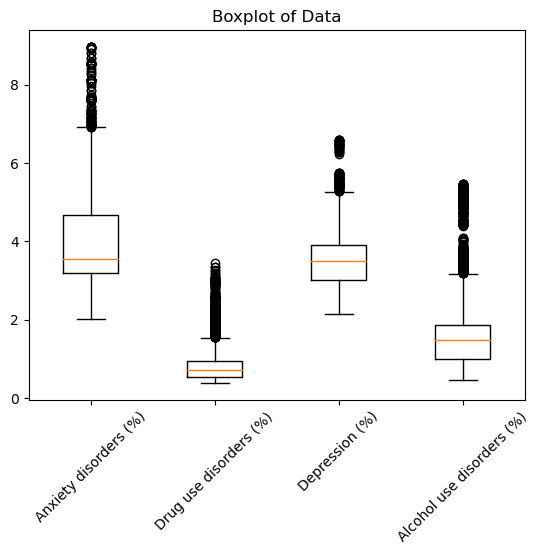

In [14]:
# Checking for outliers in the data
plt.boxplot(data.select_dtypes(include=[np.number]).values)
plt.title('Boxplot of Data')
plt.xticks(ticks=range(1, len(data.select_dtypes(include=[np.number]).columns) + 1),
		   labels=data.select_dtypes(include=[np.number]).columns, rotation=45)
plt.show()
